## Name - SUHAS K SHETTY

### - Prediction using Supervised Machine Learning 

### - In this regression task we will predict the percentage of marks that a student is expected to score based upon the the number of hours they studied.

Data can be found at:http://bit.ly/w-data

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Loading the data

data = pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head() # displays first 5 elements

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization of data for better understanding of correlation between variables

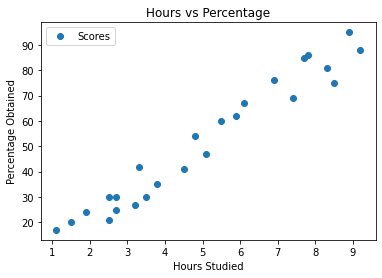

In [7]:
# plot data using matplotlib
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

### Dividing independent and dependent variables

In [8]:
x= data.iloc[:,:-1].values
y=data.iloc[:,1].values

### Splitting data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Training the algorithm

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)  # fitting our model using LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the Regression

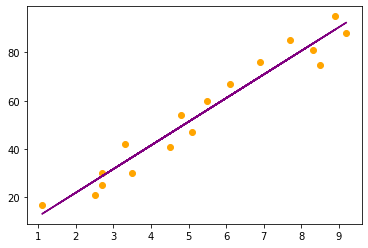

In [17]:
#Plotting the training data

line= lr.coef_*x+lr.intercept_

plt.scatter(x_train,y_train, color='orange')
plt.plot(x, line,color='purple')
plt.show()

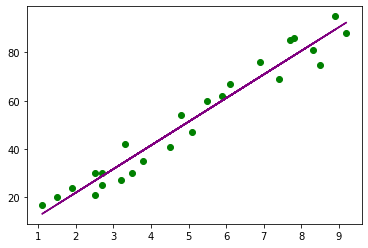

In [18]:
#plotting the test data

line= lr.coef_*x+lr.intercept_

plt.scatter(x,y, color='green')
plt.plot(x, line,color='purple')
plt.show()

### Next predict the response on our test data

In [19]:
y_pred = lr.predict(x_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

### Comparing Actual vs Predicted

In [20]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted': y_test})

In [21]:
df

,Actual,Predicted
0,20,20
1,27,27
2,69,69
3,30,30
4,62,62
5,35,35
6,24,24
7,86,86


In [22]:
#Testing with our own data

hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


### Evaluation of the model using the most common performance metrics

In [23]:
from sklearn import metrics

print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
